In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [76]:
data = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [77]:
data.info()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [78]:
#Cleaning the data
data.isnull().sum()
data.dropna(subset=["Rating"],inplace=True)
data.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [79]:
data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'], inplace=True)
data.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [80]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [81]:
#convert votes in columns
data['votes'] = data['Votes'].str.replace(',', '').astype(int)
# convert year columns
# Ensure the 'Year' column is of string type before applying str methods
data['Year'] = data['Year'].astype(str).str.strip('()').astype(int)
# convert duration columns
data['Duration'] = data['Duration'].str.strip('min')
# Converting 'Duration' to numeric, handling errors
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
#filling NaN values with the mean of numeric values
data['Duration'].fillna(data['Duration'].mean(), inplace=True)
data.isnull().sum()

<ipython-input-81-c2245713faff>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Duration'].fillna(data['Duration'].mean(), inplace=True)


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
 10  votes     7558 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 708.6+ KB


In [83]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,8
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1086
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,326


# Applying EDA

In [84]:
#top 5 movies
top_movie = data.sort_values(by='Rating', ascending=False)
top_movie.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes
8339,Love Qubool Hai,2020,94.000000,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,5
5410,Half Songs,2021,79.000000,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani,7
2563,Breed,2020,133.439124,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry,48
14222,The Reluctant Crime,2020,113.000000,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha,16
5077,Gho Gho Rani,2019,105.000000,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar,47


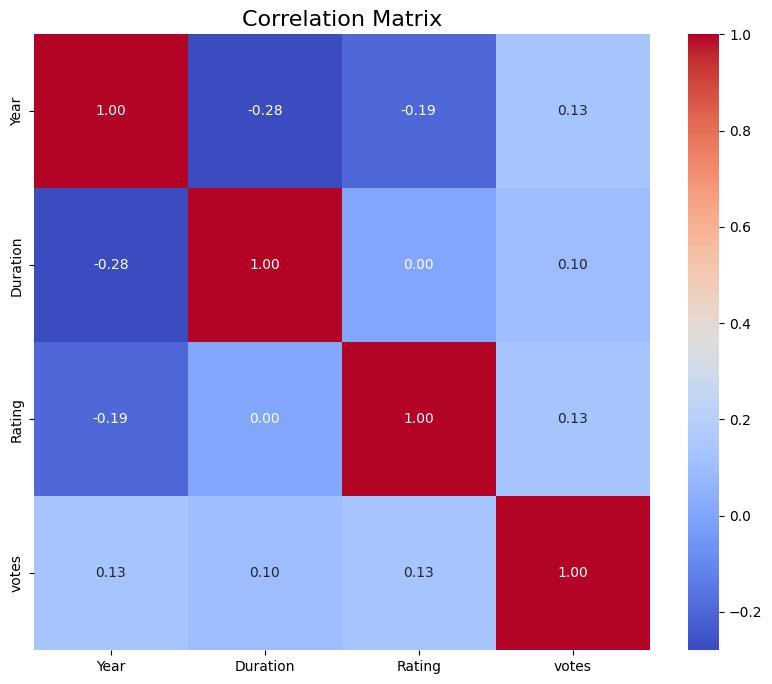

In [85]:
correlation_matrix = top_movie.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

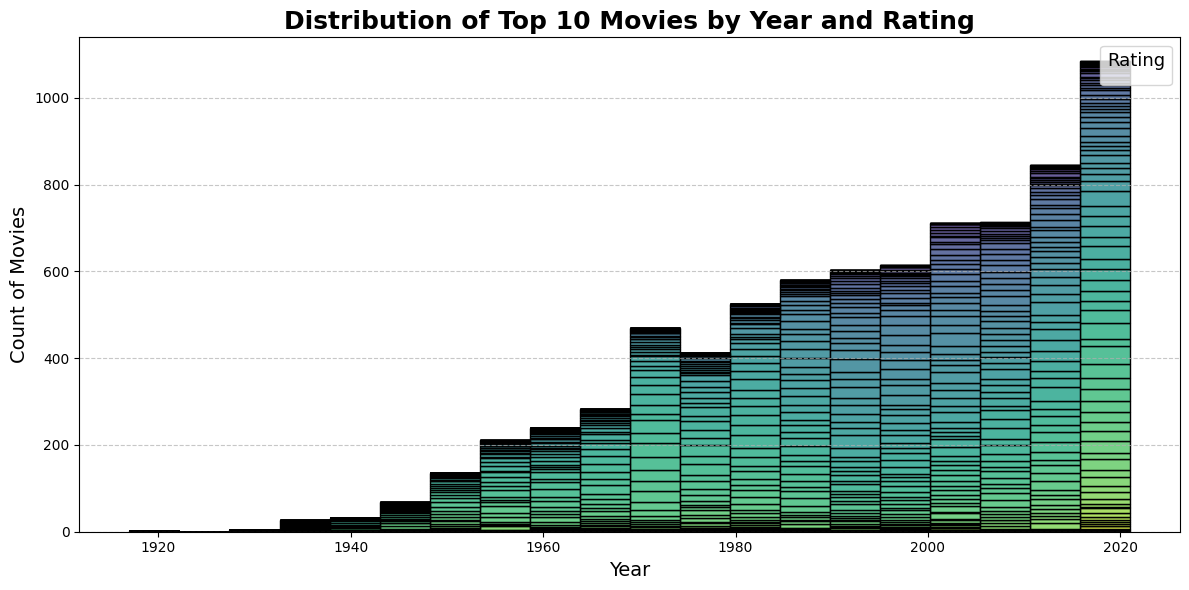

In [86]:
# Assuming 'top_movie' is your DataFrame containing the necessary data
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility

# Create a histogram with stacked bars for each rating
sns.histplot(data=top_movie, x="Year", hue="Rating", multiple="stack", palette='viridis', bins=20, alpha=0.8)

# Title and labels with improved formatting
plt.title('Distribution of Top 10 Movies by Year and Rating', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)

# Improve the legend
plt.legend(title='Rating', title_fontsize='13', fontsize='12', loc='upper right')

# Improve the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make room for the title and labels
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-87-27c4a5284003>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_movie, x='Genre', y='Rating', palette='Set2')


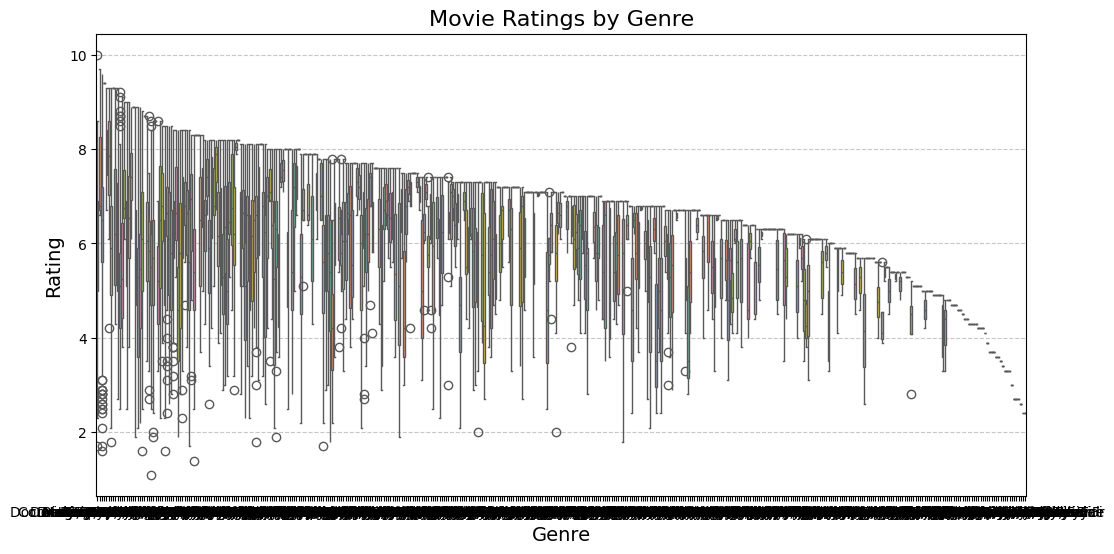

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_movie, x='Genre', y='Rating', palette='Set2')
plt.title('Movie Ratings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

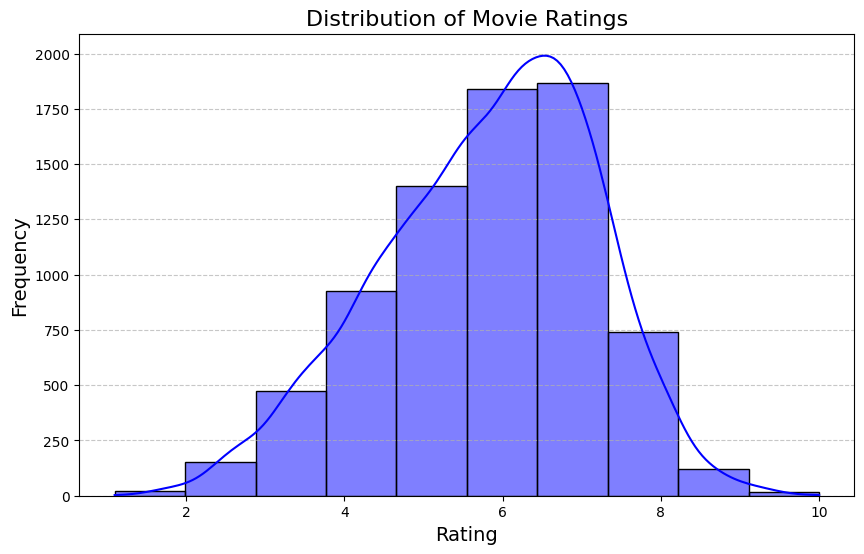

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(top_movie['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

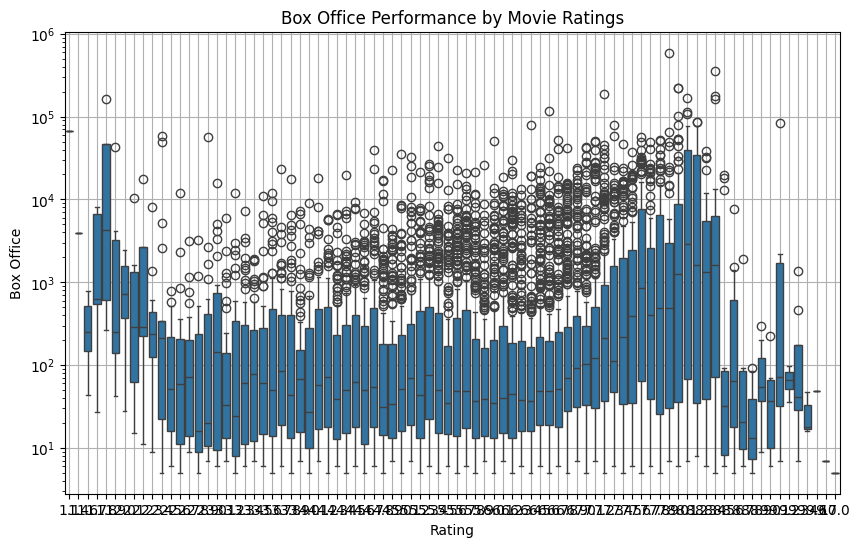

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='votes', data=top_movie)
plt.title('Box Office Performance by Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Box Office')
plt.yscale('log')  # Log scale for better visualization
plt.grid()
plt.show()

# **Distribution of Movies with rating greater than 8 and votes greater than 10000**

In [90]:
top_movie_filtered = top_movie[(top_movie['Rating'] > 8) & (top_movie['votes'] > 10000)]
top_movie_filtered.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes
13384,Soorarai Pottru,2020,153.0,Drama,9.1,"83,029",Sudha Kongara,Suriya,Madhavan,Paresh Rawal,83029
14714,Vada Chennai,2018,164.0,"Action, Crime, Drama",8.5,"13,120",Vetrimaaran,Dhanush,Ameer Sultan,Radha Ravi,13120
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,"19,493",Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav,19493
5467,Hanky Panky,1979,144.0,"Comedy, Romance",8.5,"18,376",Hrishikesh Mukherjee,Amol Palekar,Bindiya Goswami,Deven Verma,18376
3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,"165,074",Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,165074


# **Distribution of Durations of movies by years**

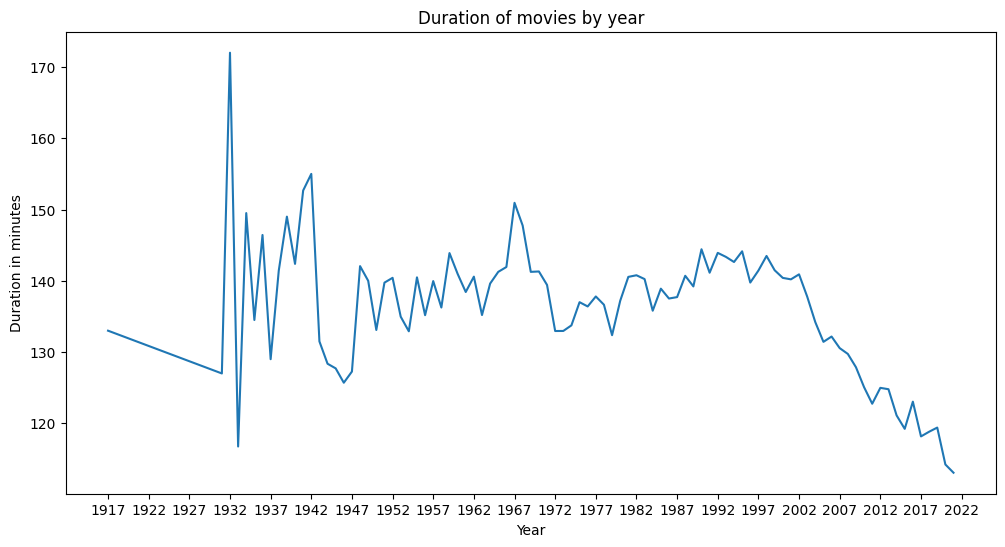

In [91]:
data['Duration'] = data['Duration'].astype(int)
data['Year'] = data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

# **Distribution of Number of movies each genre**

In [92]:
# Convert the 'Genre' column to string type before using .str accessor
data['Genre'] = data['Genre'].astype(str)
data['Genre'] = data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = data.explode('Genre')
genre_df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,8
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827


# **Featured Engineering**

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes
1,2019,109,252,7.0,8,755,1686,2725,373,8
3,2019,110,205,4.4,35,1637,1500,865,2543,35
5,1997,147,175,4.7,827,1881,481,84,2422,827
6,2005,142,315,7.4,"1,086",2486,878,1346,2996,1086
8,2012,82,351,5.6,326,161,2385,1416,1189,326


In [94]:
columns_to_clean = ['Votes']


for col in columns_to_clean:

    if not pd.api.types.is_string_dtype(trans_data[col]):
        trans_data[col] = trans_data[col].astype(str)

    trans_data[col] = trans_data[col].str.replace(',', '')
    trans_data[col] = pd.to_numeric(trans_data[col])


print(trans_data[columns_to_clean].head())


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data, columns=trans_data.columns)

print(sc_df.head())

   Votes
1      8
3     35
5    827
6   1086
8    326
       Year  Duration     Genre    Rating     Votes  Director   Actor 1  \
0  0.980769  0.293333  0.607229  0.662921  0.000005  0.255499  0.698426   
1  0.980769  0.296667  0.493976  0.370787  0.000051  0.553976  0.621375   
2  0.769231  0.420000  0.421687  0.404494  0.001390  0.636548  0.199254   
3  0.846154  0.403333  0.759036  0.707865  0.001828  0.841286  0.363712   
4  0.913462  0.203333  0.845783  0.505618  0.000543  0.054484  0.987987   

    Actor 2   Actor 3     votes  
0  0.979511  0.123102  0.000005  
1  0.310927  0.839274  0.000051  
2  0.030194  0.799340  0.001390  
3  0.483825  0.988779  0.001828  
4  0.508986  0.392409  0.000543  


In [95]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.134655
votes,0.134655
Genre,0.122565
Actor 2,0.038852
Actor 3,0.031550
Actor 1,0.025089
Duration,0.002565
Director,-0.003678
Year,-0.194990


<Axes: >

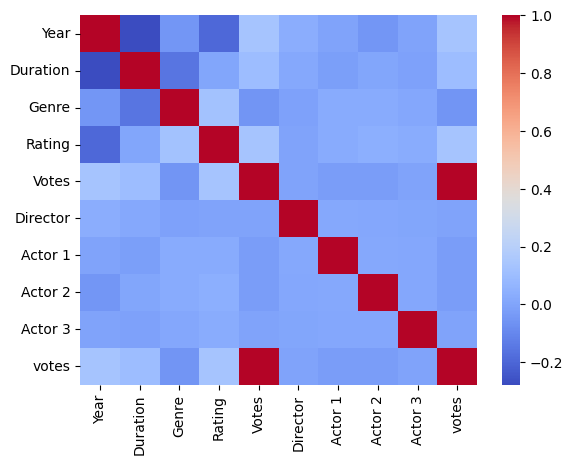

In [96]:

sns.heatmap(corr_df,annot=False,cmap="coolwarm")

# **Model Building**

In [97]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [99]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [100]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [101]:
y_pred

array([6.36271538, 6.26430266, 6.23740195, ..., 5.68610226, 6.25254025,
       6.10456314])

In [102]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.0837752752588038
Mean squared error:  1.6992498894056787
Mean absolute error:  1.0293326923650752


In [103]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
